# Mauna Loa CO2

In this Notebook (as a lot of other ones) we'll consider modelling the Mauna Loa CO2 dataset using structural timeseries in numpyro. As always, we begin importing the data

In [5]:
import pandas as pd
from sklearn.datasets import fetch_openml

datas = fetch_openml(data_id=41187, as_frame=True).frame
datas.head()

,year,month,day,weight,flag,station,co2
0,1958,3,29,4,0,MLO,316.1
1,1958,4,5,6,0,MLO,317.3
2,1958,4,12,4,0,MLO,317.6
3,1958,4,19,6,0,MLO,317.5
4,1958,4,26,2,0,MLO,316.4


Let's construct a proper date time value and set as index

In [6]:
datas.index = datas.apply(lambda u: pd.Timestamp(year=u["year"], month=u["month"], day=u["day"]), axis=1)

datas.head()

,year,month,day,weight,flag,station,co2
1958-03-29,1958,3,29,4,0,MLO,316.1
1958-04-05,1958,4,5,6,0,MLO,317.3
1958-04-12,1958,4,12,4,0,MLO,317.6
1958-04-19,1958,4,19,6,0,MLO,317.5
1958-04-26,1958,4,26,2,0,MLO,316.4


Let's only select the CO2 column and resample to monthly

Text(0.5, 1.0, 'CO2 at Mauna Loa')

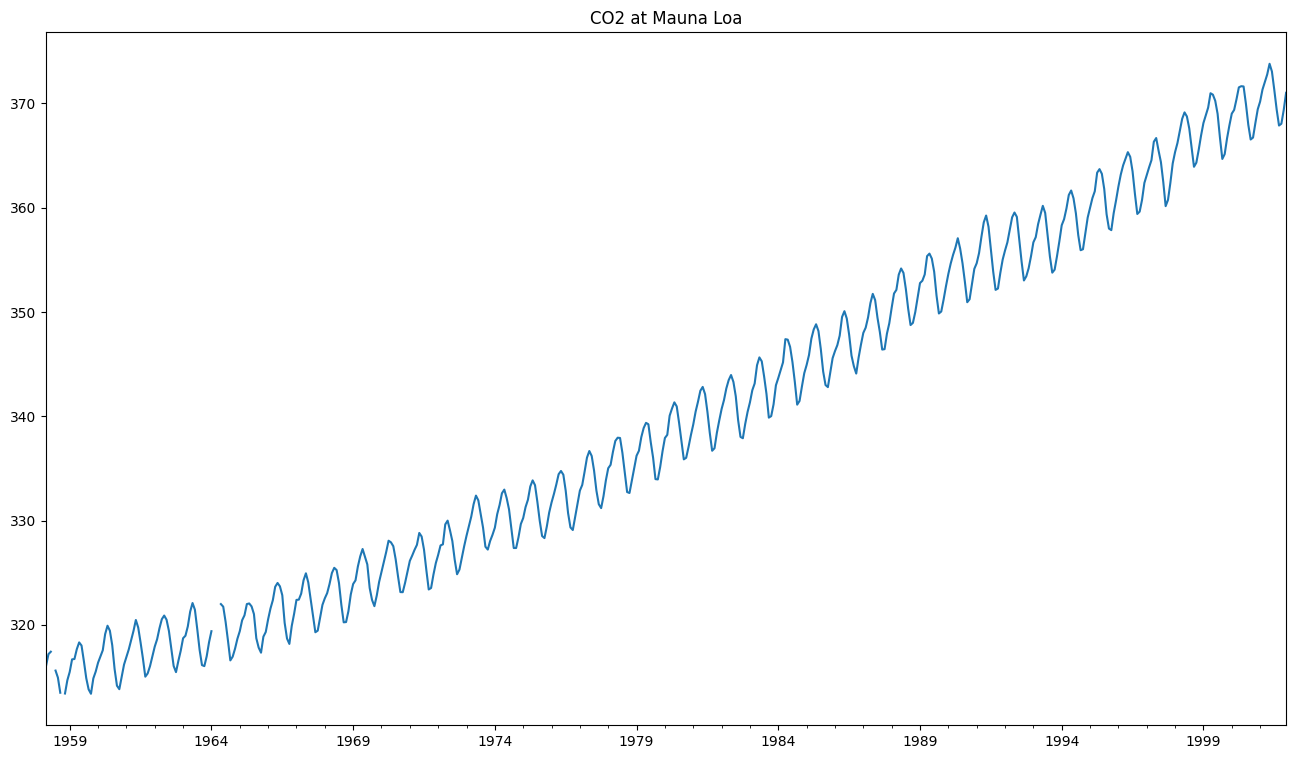

In [7]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (16, 9)

co2 = datas["co2"].resample("ME").mean()

fig, ax = plt.subplots()
co2.plot(ax=ax)

ax.set_title("CO2 at Mauna Loa")